In [1]:
# !ls /root/data/processed/synthetic_cabin_bw/A_Pillar_Codriver/images/val

In [2]:
# problematic images = /root/data/processed/drive_and_act/images/train/5019.jpg
# problematic images = /root/data/processed/drive_and_act/images/train/1610.jpg
# problematic images = /root/data/processed/drive_and_act/images/train/1850.jpg
# problematic images = /root/data/processed/drive_and_act/images/train/4940.jpg
# problematic images = /root/data/processed/drive_and_act/images/train/5033.jpg
# problematic images = /root/data/processed/drive_and_act/images/train/1589.jpg
# problematic images = /root/data/processed/drive_and_act/images/train/4924.jpg
# problematic images = /root/data/processed/drive_and_act/images/train/9692.jpg
# problematic images = /root/data/processed/drive_and_act/images/train/1706.jpg
# problematic images = /root/data/processed/drive_and_act/images/train/1708.jpg
# problematic images = /root/data/processed/drive_and_act/images/train/1153.jpg
# problematic images = /root/data/processed/drive_and_act/images/train/938.jpg
# problematic images = /root/data/processed/drive_and_act/images/train/1029.jpg
# problematic images = /root/data/processed/drive_and_act/images/train/4951.jpg
# problematic images = /root/data/processed/drive_and_act/images/train/1680.jpg
# problematic images = /root/data/processed/drive_and_act/images/train/9809.jpg

In [3]:
# img_path = f'/root/data/processed/drive_and_act/images/train/1689.jpg'
# img_path = f'/root/data/processed/drive_and_act/images/train/7184.jpg'
img_path = f'/root/data/processed/drive_and_act/images/train/938.jpg'
# img_path = f'/root/data/processed/drive_and_act/images/train/10719.jpg'

In [4]:
from modules.human_detector.human_detector import HumanDetector

detector = HumanDetector(
    config_path='./src/modules/human_detector/config/faster_rcnn.py',
    pretrained_path='https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/'\
        'faster_rcnn_r101_caffe_fpn_1x_coco/faster_rcnn_r101_caffe_fpn_1x_coco_bbox_mAP-0.398_20200504_180057-b269e9dd.pth',
    checkpoint_path='https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/'\
        'faster_rcnn_r101_caffe_fpn_1x_coco/faster_rcnn_r101_caffe_fpn_1x_coco_bbox_mAP-0.398_20200504_180057-b269e9dd.pth',
    data_root_path='/root/data/processed/drive_and_act/',
    device='cuda:0',
    working_directory='./mmengine_workdir/human_detector',
    log_level='CRITICAL'
)

detector.load_pretrained()
detector_result = detector.get_bbox(img_path)
bbox = detector_result['bboxes']
print(bbox)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r101_caffe_fpn_1x_coco/faster_rcnn_r101_caffe_fpn_1x_coco_bbox_mAP-0.398_20200504_180057-b269e9dd.pth
tensor([[324.0843, 204.8188, 879.4614, 530.8299]], device='cuda:0')


In [5]:
# import torch
# pred = detector_result['pred']
# human_mask = (pred['labels'] == 0)
# print(human_mask)
# print()
# index = pred['scores'][human_mask].argmax()
# if pred['scores'][human_mask][index] < 0.5:
#     print(f'{img_path} has mask with {pred["scores"][human_mask][index]}')
# index = index.unsqueeze(0)
# bboxes = pred['bboxes'][human_mask][index]
# bboxes

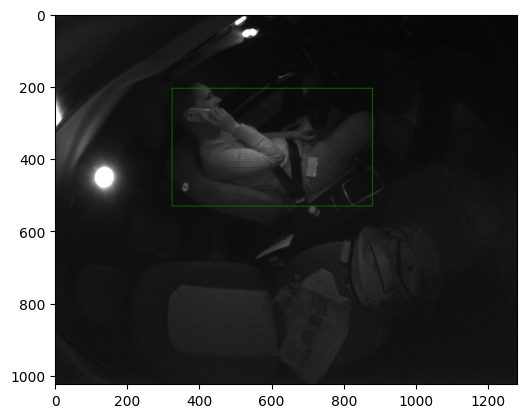

In [6]:
detector.visualise(img_path, bbox)

In [7]:
bbox

tensor([[324.0843, 204.8188, 879.4614, 530.8299]], device='cuda:0')

In [8]:
from modules.pose_estimator_2d.pose_estimator_2d import PoseEstimator2D
import numpy as np

pose_estimator_2d = PoseEstimator2D(
    config_path='modules/pose_estimator_2d/config/hrnet.py',
    pretrained_path='https://download.openmmlab.com/mmpose/v1' \
        '/body_2d_keypoint/topdown_heatmap/coco'\
            '/td-hm_hrnet-w32_8xb64-210e_coco-256x192-81c58e40_20220909.pth',
    checkpoint_path='https://download.openmmlab.com/mmpose/v1' \
        '/body_2d_keypoint/topdown_heatmap/coco'\
            '/td-hm_hrnet-w32_8xb64-210e_coco-256x192-81c58e40_20220909.pth',
    data_root_path='/root/data/processed/drive_and_act',
    device='cuda:0',
    working_directory='mmengine_workdir/pose_estimator_2d',
    log_level='CRITICAL'
)
# pose_estimator_2d.update_config()
pose_estimator_2d.load_pretrained()
pose_estimator_2d_result = pose_estimator_2d.inference(img_path, bbox.detach().cpu().numpy(), bbox_format='xywh')
# pose_estimator_2d_result = pose_estimator_2d.inference(img_path, bbox, bbox_format='xywh')
# pose_estimator_2d_result = pose_estimator_2d.inference(img_path, np.array([[0, 0, 1200, 1000]]), bbox_format='xywh')
keypoints_2D = pose_estimator_2d_result[0].pred_instances['keypoints'][0]
print(keypoints_2D)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/body_2d_keypoint/topdown_heatmap/coco/td-hm_hrnet-w32_8xb64-210e_coco-256x192-81c58e40_20220909.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std

img_path /root/data/processed/drive_and_act/images/train/938.jpg <class 'str'>
bboxes [[324.0843  204.81882 879.46136 530.8299 ]] <class 'numpy.ndarray'>
bbox_format xywh <class 'str'>
[[ 448.90365855  246.93303061]
 [ 448.90365855  235.48171091]
 [ 426.0010198   246.93303061]
 [ 437.45233917  246.93303061]
 [ 391.64706167  292.73830938]
 [ 460.35497793  338.54358816]
 [ 437.45233917  395.80018663]
 [ 597.77081045  372.89754725]
 [ 609.22212982  384.34886694]
 [ 666.4787267   338.54358816]
 [ 494.70893606  304.18962908]
 [ 677.93004608  418.70282602]
 [ 689.38136546  464.5081048 ]
 [ 861.15115611  292.73830938]
 [ 861.15115611  304.18962908]
 [1021.46962738  384.348866

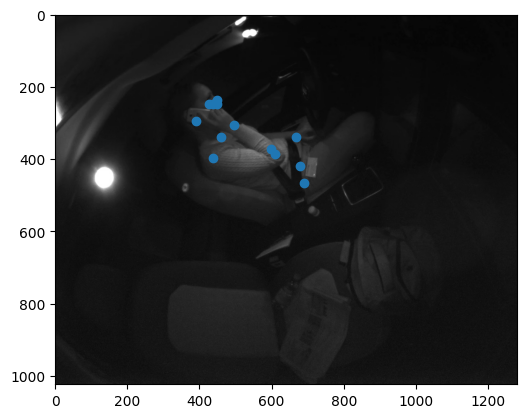

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

keypoints = pd.DataFrame(keypoints_2D[:13], columns=['x', 'y'])

img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.scatter(keypoints['x'], keypoints['y'])

plt.show()

In [10]:
# import json
# import numpy as np
# with open(f'/root/data/processed/synthetic_cabin_bw/{camera_position}/annotations/person_keypoints_{data_split}.json') as f:
#     data = json.loads(f.readline())

# annotations = {}
# for id in range(len(data['images'])):
#     annotations[data['images'][id]['file_name']] = {
#         'keypoints': np.array(data['annotations'][id]['keypoints']).reshape(-1, 3)[:, :2]
#     }

In [11]:
# pose_estimator_2d.visualize(
#     img_path=img_path,
#     bboxes=bbox.tolist(),
#     bbox_format='xywh',
#     gt_keypoints=np.expand_dims(annotations[img_name]['keypoints'], 0)
# )